In [30]:

import pandas as pd
import numpy as np
import re
import lxml
import seaborn as sns
import matplotlib as plt

%matplotlib inline

In [15]:
df = pd.read_csv('movieData.csv')

In [16]:
df.columns

Index(['Unnamed: 0', 'Title', 'Year', 'Genre', 'Rating', 'Score', 'Director',
       'Stars', 'Gross'],
      dtype='object')

In [34]:
df.drop(columns = ['Unnamed: 0'], axis = 0,inplace = True)

#drop extra index column

KeyError: "['Unnamed: 0'] not found in axis"

In [50]:
df['Gross'] = df['Gross'].astype(str)

In [62]:
df['Gross'] = df['Gross'].apply(lambda x: x.replace(',',''))
df['Gross'] = df['Gross'].apply(lambda x: x.replace('$',''))

In [64]:
df['Gross'] = df['Gross'].astype(int)

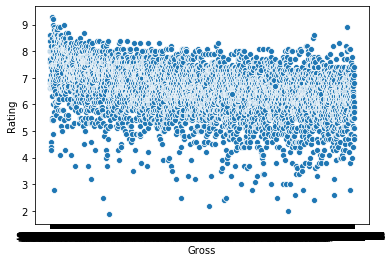

In [31]:
gross = df['Gross']
rating = df['Rating']
ax = sns.scatterplot(x = 'Gross',y = 'Rating', data = df)


In [65]:
df.corr()

,Year,Rating,Score,Gross
Year,1.000000,-0.130756,0.016249,0.116574
Rating,-0.130756,1.000000,0.572534,0.195053
Score,0.016249,0.572534,1.000000,0.216491
Gross,0.116574,0.195053,0.216491,1.000000


In [96]:
df[['Director','Gross','Genre']].groupby('Genre').mean().sort_values('Gross', ascending = False)

,Gross
Genre,
"['Adventure', ' Drama', ' Sci-Fi']",2.242822e+08
"['Family', ' Sci-Fi']",2.214757e+08
"['Musical', ' Romance']",1.899691e+08
"['Action', ' Adventure', ' Sci-Fi']",1.841471e+08
"['Action', ' Adventure']",1.774741e+08
...,...
"['Romance', ' Thriller']",5.074630e+05
"['Musical', ' Romance', ' War']",4.580000e+05
"['Comedy', ' Thriller']",4.014630e+05


In [127]:
score = df[['Director','Gross','Score']].groupby('Score').mean().sort_values('Gross', ascending = False)

rating = df[['Director','Gross','Rating']].groupby('Rating').mean().sort_values('Gross', ascending = False)



In [138]:
score['Score']=score.index
rating['Rating']=rating.index
rating['Log Rating']=np.log(rating['Rating'])
rating['Log Gross']=np.log(rating['Gross'])


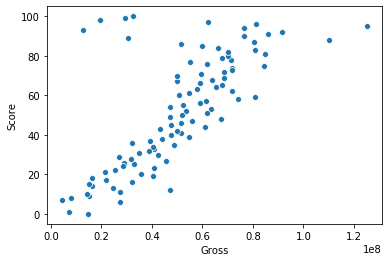

In [129]:
ax = sns.scatterplot(x = 'Gross',y = 'Score', data = score)

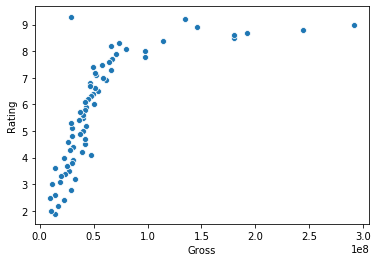

In [132]:
ax = sns.scatterplot(x = 'Gross',y = 'Rating', data = rating)

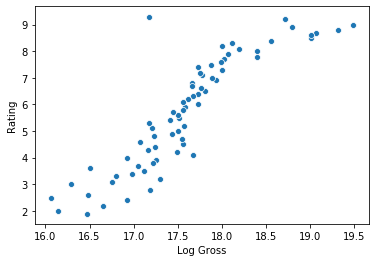

In [139]:
ax = sns.scatterplot(x = 'Log Gross',y = 'Rating', data = rating)